In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('death_rates_before.csv')
data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Первый взгляд:

In [3]:
data.shape

(12, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
data.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [6]:
data.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

Характеристики групп:

In [7]:
data.clinic.value_counts()

clinic 1    6
clinic 2    6
Name: clinic, dtype: int64

In [8]:
data.groupby('clinic').deaths.mean()

clinic
clinic 1    331.500000
clinic 2    115.166667
Name: deaths, dtype: float64

In [9]:
data.groupby('clinic').births.mean()

clinic
clinic 1    3340.333333
clinic 2    2965.166667
Name: births, dtype: float64

Распределение:

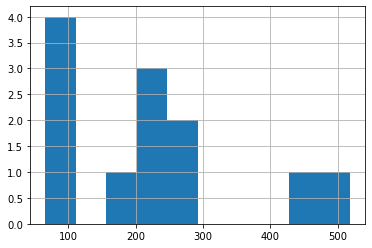

In [10]:
import matplotlib.pyplot as plt
data.deaths.hist()
plt.show()

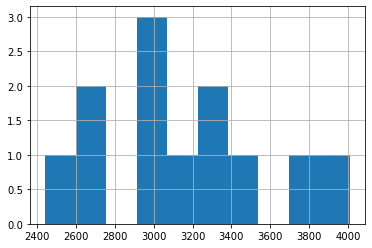

In [11]:
data.births.hist()
plt.show()

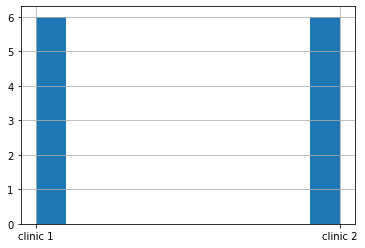

In [12]:
data.clinic.hist()
plt.show()

Подготовка данных

In [13]:
data.clinic = data.clinic.apply(
    lambda x: 1 if x == 'clinic 1' else 2
)
data

,year,births,deaths,clinic
0,1841,3036,237,1
1,1842,3287,518,1
2,1843,3060,274,1
3,1844,3157,260,1
4,1845,3492,241,1
5,1846,4010,459,1
6,1841,2442,86,2
7,1842,2659,202,2
8,1843,2739,164,2
9,1844,2956,68,2


Машинное обучение:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [15]:
X = data[['births', 'deaths']]
y = pd.to_numeric(data['clinic'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
logistic = LogisticRegression()
logistic_model = logistic.fit(X_train, y_train)

In [17]:
tree = DecisionTreeClassifier(criterion='gini')
tree_model = tree.fit(X_train, y_train)

In [18]:
svc = SVC()
svc_model = svc.fit(X_train, y_train)

Оценка:

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
accuracy_score(y_test, logistic_model.predict(X_test))

0.6666666666666666

In [21]:
precision_score(y_test, logistic_model.predict(X_test))

0.5

In [22]:
recall_score(y_test, logistic_model.predict(X_test))

1.0

In [23]:
f1_score(y_test, logistic_model.predict(X_test))

0.6666666666666666

In [24]:
accuracy_score(y_test, tree_model.predict(X_test))

1.0

In [25]:
precision_score(y_test, tree_model.predict(X_test))

1.0

In [26]:
recall_score(y_test, tree_model.predict(X_test))

1.0

In [27]:
f1_score(y_test, tree_model.predict(X_test))

1.0

In [28]:
accuracy_score(y_test, svc_model.predict(X_test))

0.3333333333333333

In [29]:
precision_score(y_test, svc_model.predict(X_test))

0.3333333333333333

In [30]:
recall_score(y_test, svc_model.predict(X_test))

1.0

In [31]:
f1_score(y_test, svc_model.predict(X_test))

0.5